In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
np.random.seed(42)

num_fotons = 200
colapso_em_foton = 100  # índice do colapso

# Antes do colapso: interferência (dupla fenda)
x1 = np.random.normal(loc=-0.3, scale=0.1, size=colapso_em_foton // 2)
x2 = np.random.normal(loc=0.3, scale=0.1, size=colapso_em_foton // 2)
interferencia = np.concatenate([x1, x2])

# Depois do colapso: padrão uniforme
sem_interferencia = np.random.uniform(-0.5, 0.5, num_fotons - colapso_em_foton)

# Padrão completo
detec_total = np.concatenate([interferencia, sem_interferencia])
bins = np.linspace(-1, 1, 40)
counts = np.zeros(len(bins) - 1)

Text(0, 0.5, 'Fótons detectados')

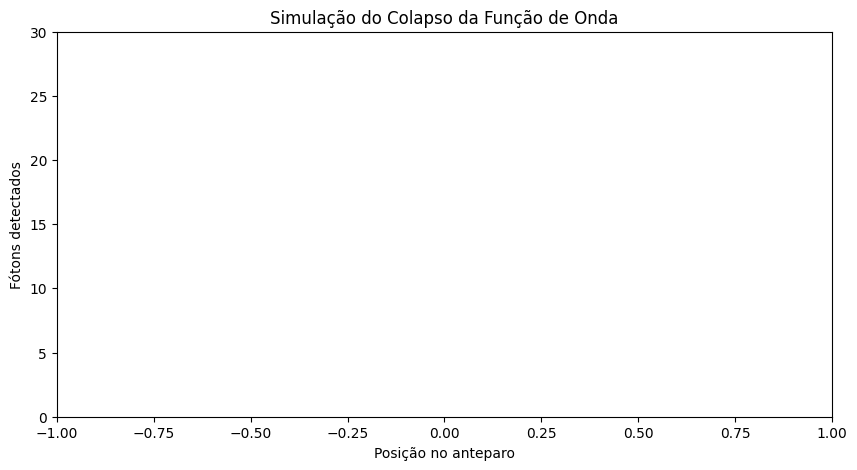

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar((bins[:-1] + bins[1:]) / 2, counts, width=0.05, color='deepskyblue')
ax.set_xlim(-1, 1)
ax.set_ylim(0, 30)
ax.set_title("Simulação do Colapso da Função de Onda")
ax.set_xlabel("Posição no anteparo")
ax.set_ylabel("Fótons detectados")

In [4]:
def update(frame):
    if frame >= num_fotons:
        return bars

    x_novo = detec_total[frame]
    bin_idx = np.searchsorted(bins, x_novo) - 1

    if 0 <= bin_idx < len(counts):
        counts[bin_idx] += 1
        bars[bin_idx].set_height(counts[bin_idx])

    # Flash visual no momento do colapso
    if frame == colapso_em_foton:
        for b in bars:
            b.set_color('red')
    elif frame == colapso_em_foton + 3:
        for b in bars:
            b.set_color('deepskyblue')

    return bars

In [5]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=num_fotons,
    interval=50,
    blit=False,
    repeat=False
)

HTML(ani.to_jshtml())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f005ecdb-da4f-4484-8639-0db890a640f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>